# Program will be divided in 3 steps
* Preprocessing the data
* Visualizing the data
* Modelling

## Processing the data

#### Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
features = pd.read_csv("C:/Users/ashwa/Desktop/BluePi/sales-prediction/features.csv")
stores = pd.read_csv("C:/Users/ashwa/Desktop/BluePi/sales-prediction/stores.csv")
train = pd.read_csv("C:/Users/ashwa/Desktop/BluePi/sales-prediction/train.csv")
test = pd.read_csv("C:/Users/ashwa/Desktop/BluePi/sales-prediction/test.csv")

#### Preprocessing

In [3]:
features.shape

(8190, 12)

In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


*No null Value except in feature table. (Will handle it later)\
We will first merge the table features and stores*

In [8]:
feat_stores = pd.merge(features, stores, how = "left")
feat_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [9]:
new_train = pd.merge(train, feat_stores, how = "left")
new_test = pd.merge(test, feat_stores, how = "left")
new_train.Date = pd.to_datetime(new_train["Date"])
new_test.Date = pd.to_datetime(new_test["Date"])
#new_train.set_index(keys = "Date", inplace = True)
new_test.set_index(keys = "Date", inplace = True)
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [10]:
new_test.tail()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,
2013-06-28,45,98,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
2013-07-05,45,98,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
2013-07-12,45,98,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221
2013-07-19,45,98,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221
2013-07-26,45,98,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221


## Discover and Visualize the Data to Gain Insights

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

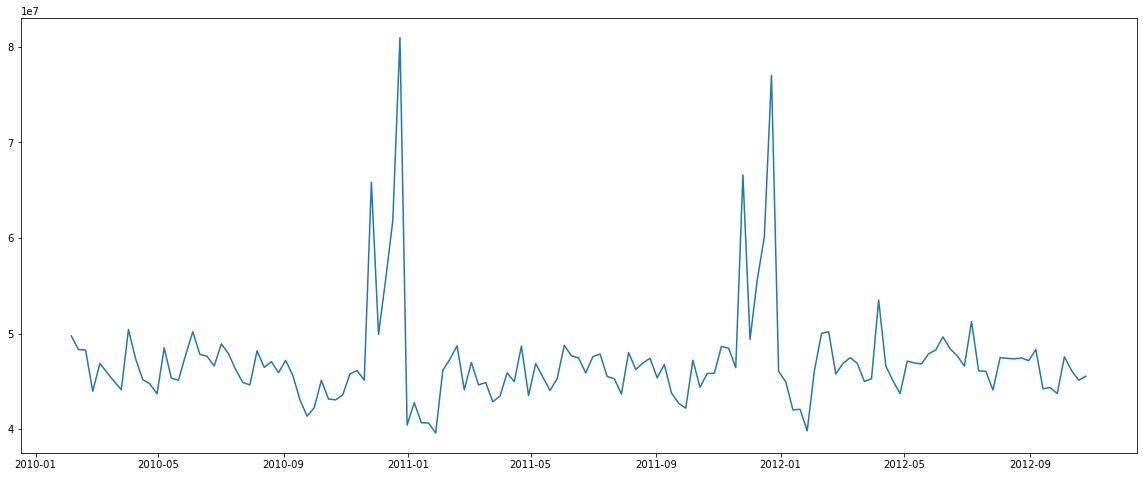

In [12]:
total_weekly_sale = new_train.groupby(by=["Date"], as_index = False)["Weekly_Sales"].sum()

plt.figure(figsize=(20,8))
plt.plot(total_weekly_sale.Date, total_weekly_sale.Weekly_Sales)
plt.show

*We can see the seasonality across the total sale of a week*

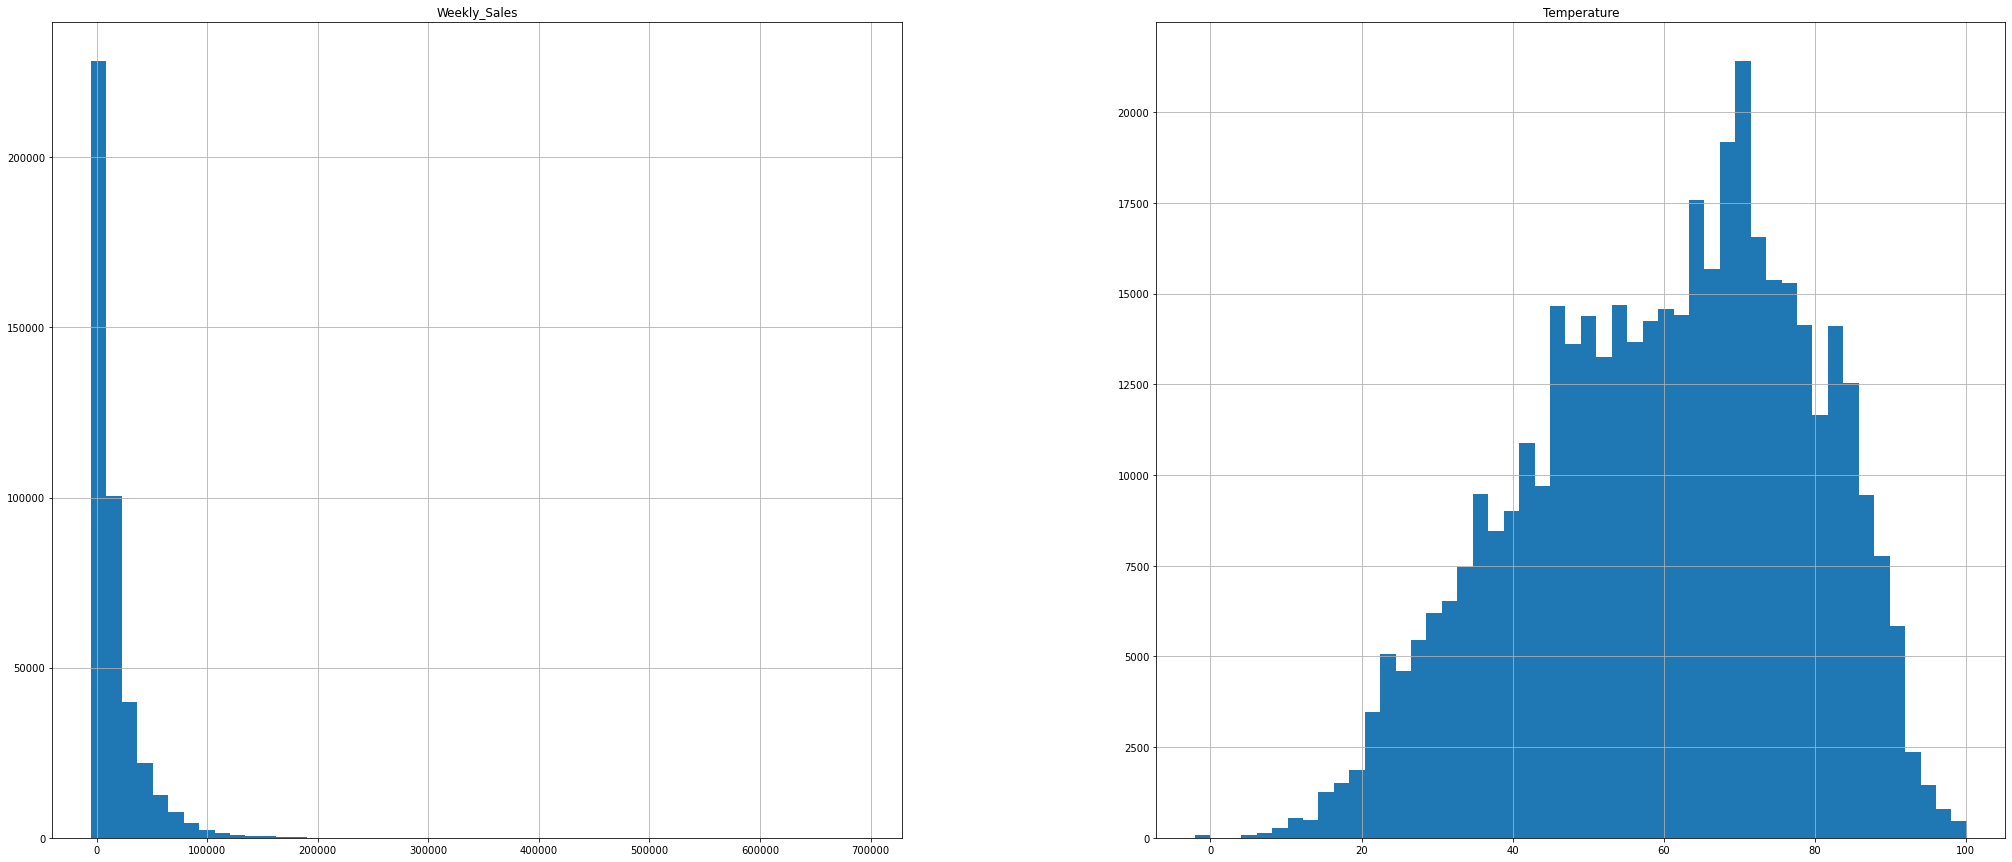

In [13]:
new_train[["Weekly_Sales", "Temperature"]].hist(bins=50, figsize=(35,15))
plt.show()

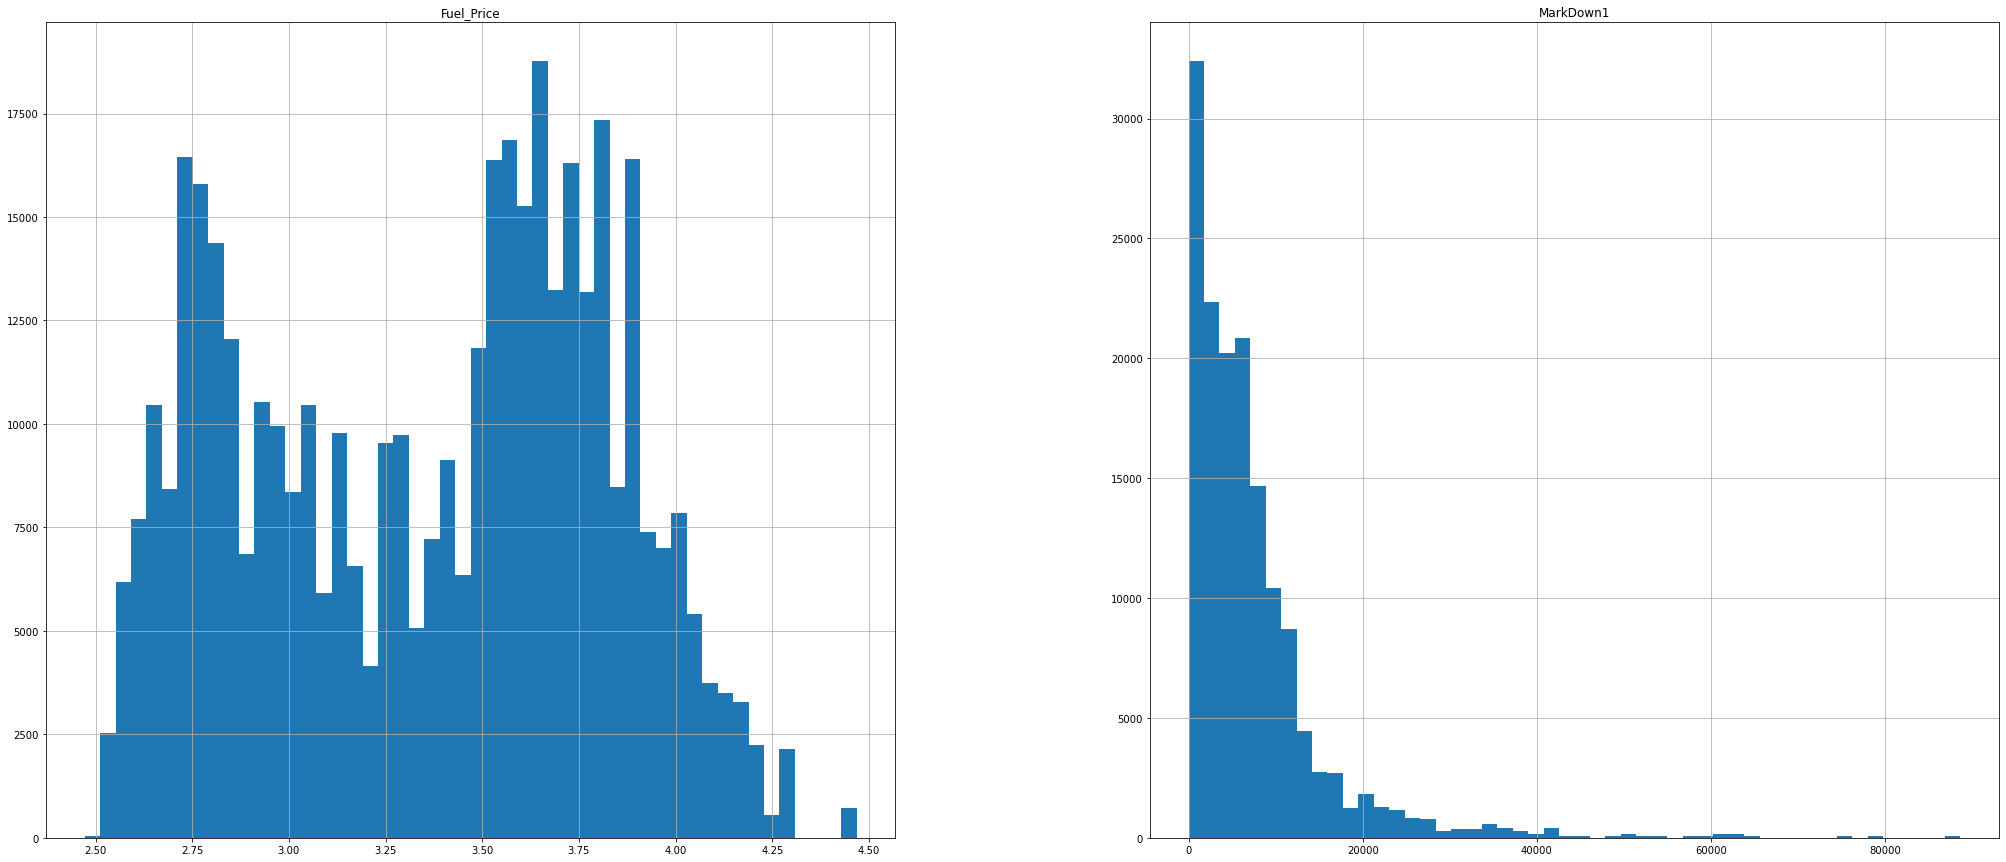

In [14]:
new_train[["Fuel_Price", "MarkDown1"]].hist(bins=50, figsize=(35,15))
plt.show()

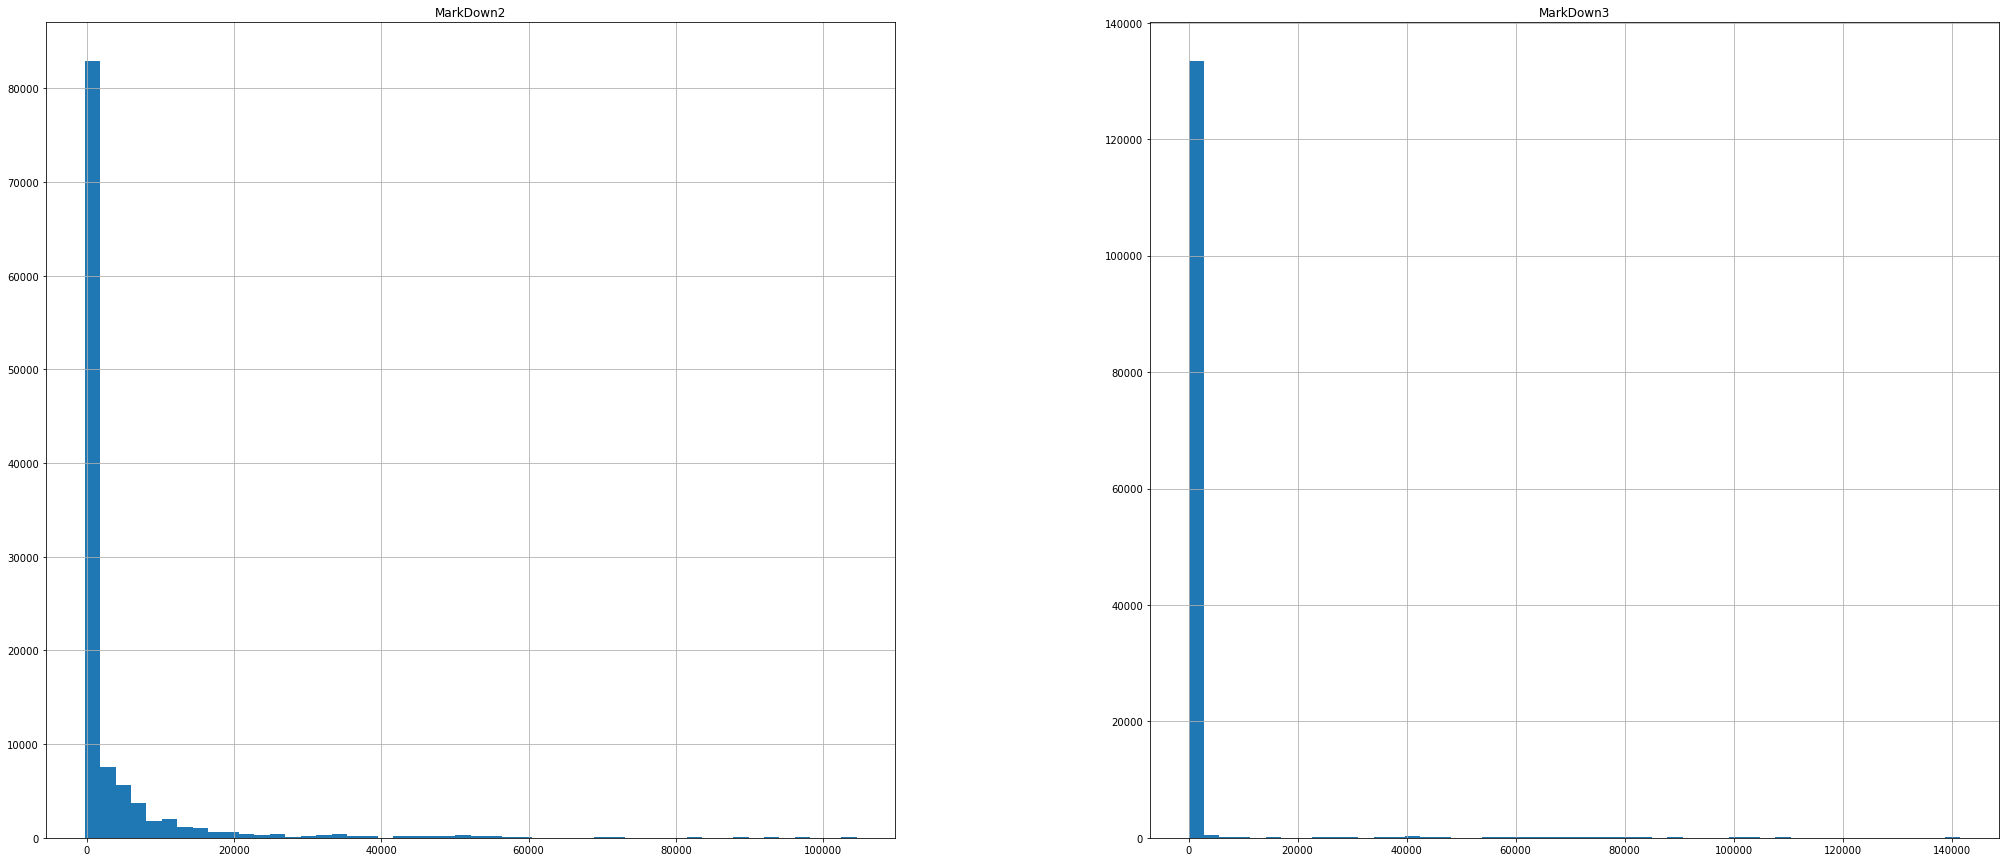

In [15]:
new_train[["MarkDown2", "MarkDown3"]].hist(bins=50, figsize=(35,15))
plt.show()

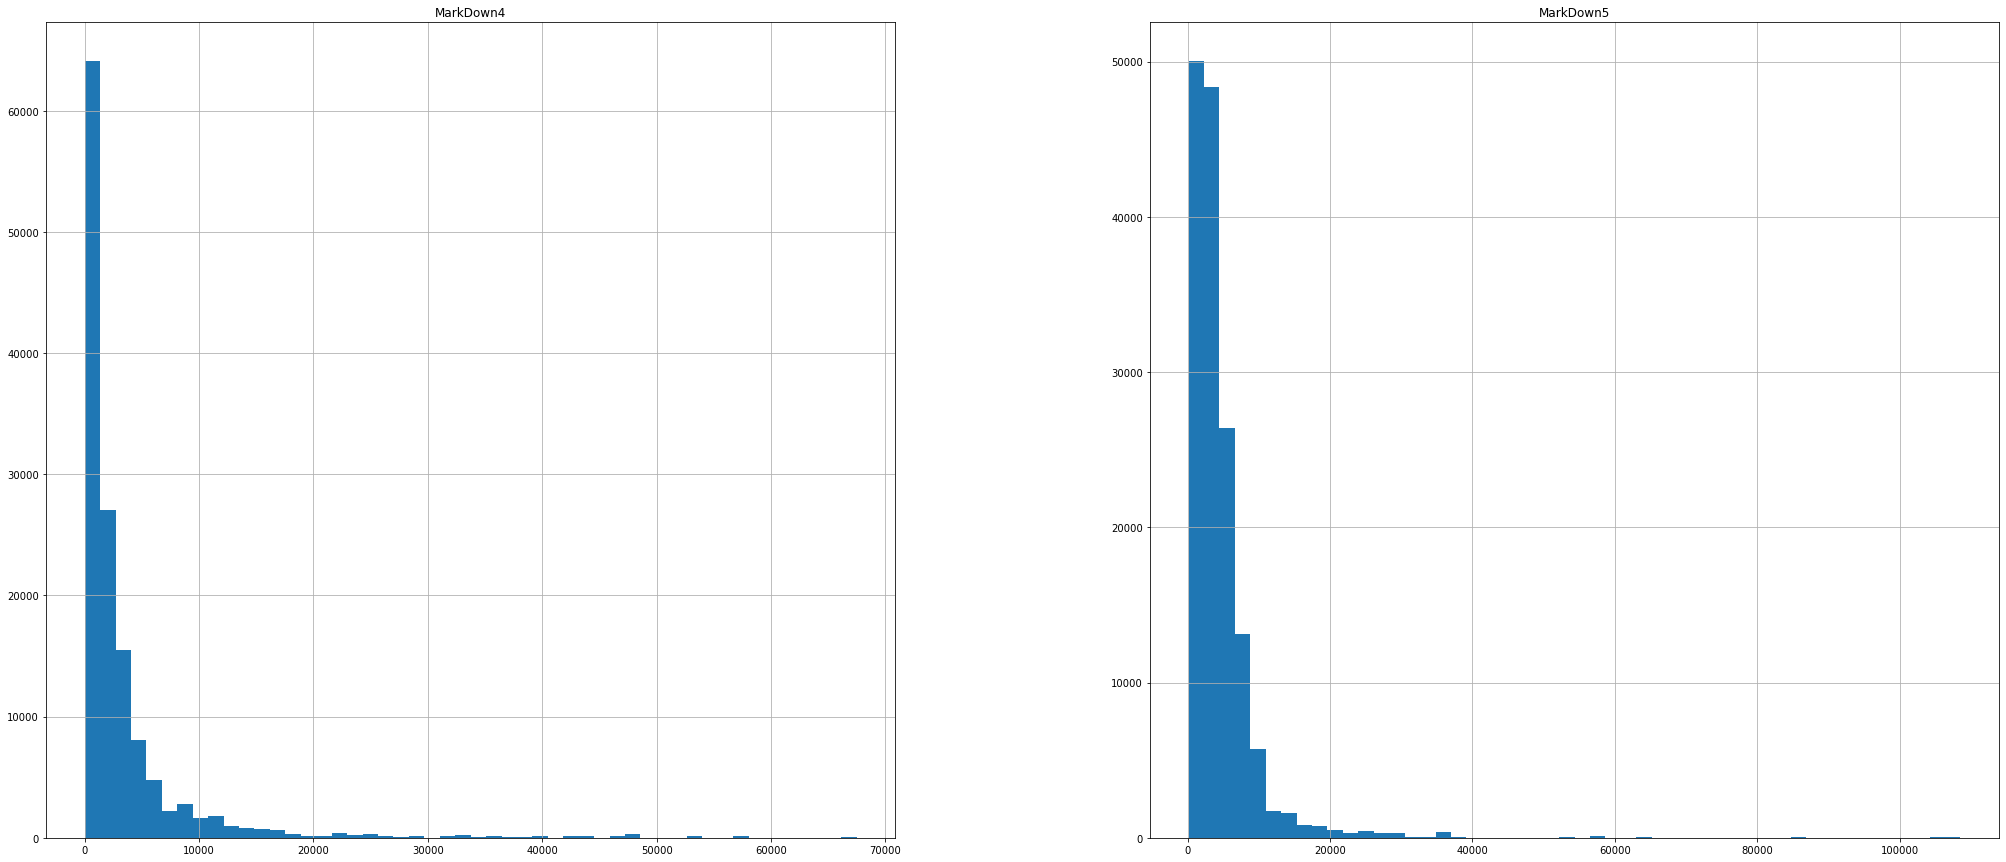

In [16]:
new_train[["MarkDown4", "MarkDown5"]].hist(bins=50, figsize=(35,15))
plt.show()

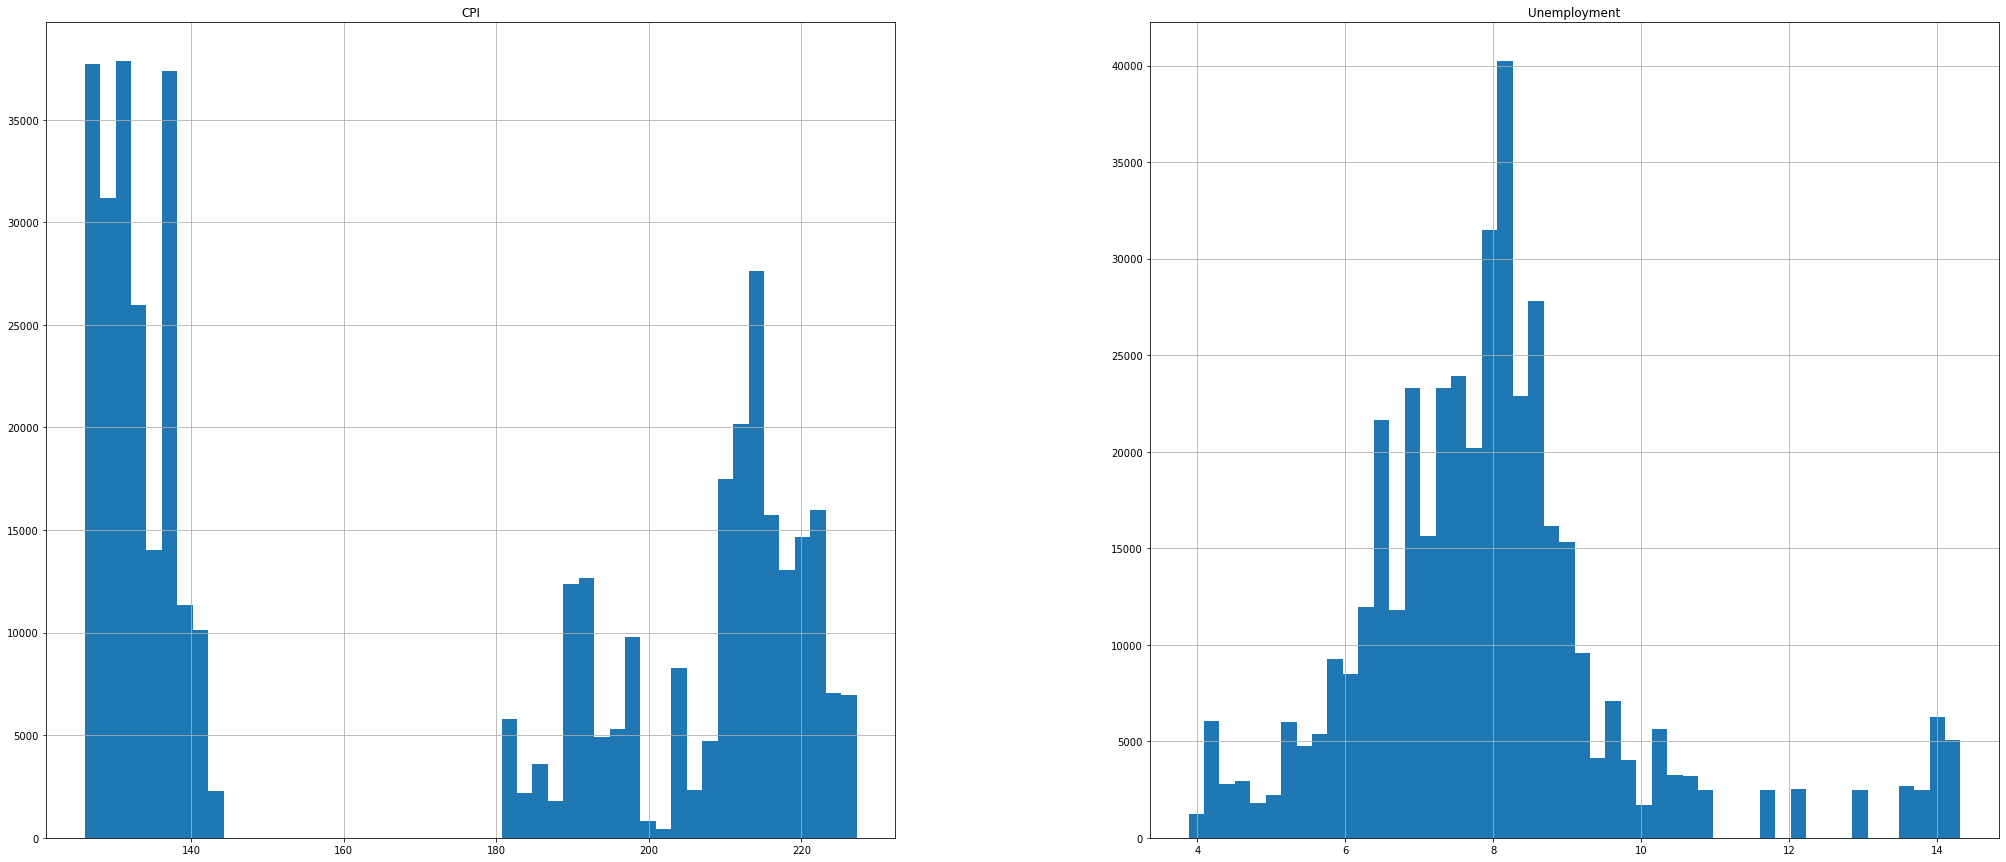

In [17]:
new_train[["CPI", "Unemployment"]].hist(bins=50, figsize=(35,15))
plt.show()

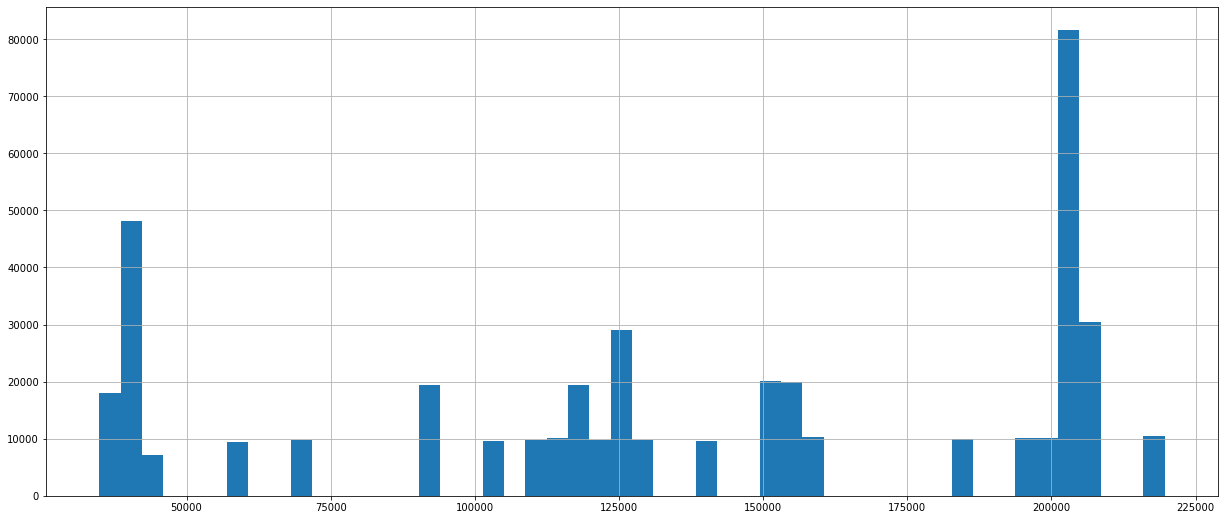

In [18]:
new_train["Size"].hist(bins=50, figsize=(21,9))
plt.show()

*Many histogram are tail-heavy. They extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns.\
Before we dig deeper let's see which features are useful with respect to Weekly_Sales.*

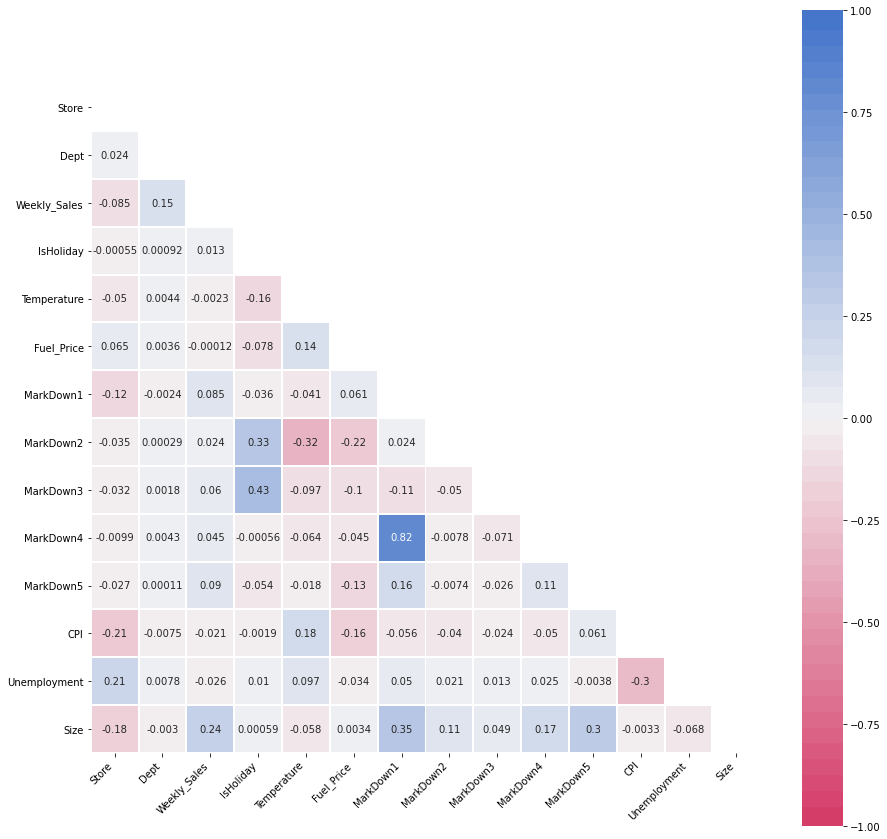

In [19]:
import seaborn as sns

corr = new_train.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, square=True, ax=ax, cmap=sns.diverging_palette(0, 255, n=50),
            linewidths = 1, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

*Here we can see that Fuel_Price is close to no correlation. Then IsHoliday and Temprature, but we will keep this for the time being\
Dropping Fuel_Price in the training datset (i.e. new_train)*

In [20]:
new_train.drop(["Fuel_Price"], axis=1, inplace=True)
new_test.drop(["Fuel_Price"], axis=1, inplace=True)
new_train.set_index(keys = "Date", inplace = True)

MarkDown1          AxesSubplot(0.125,0.657941;0.227941x0.222059)
MarkDown2       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
MarkDown3       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
MarkDown4          AxesSubplot(0.125,0.391471;0.227941x0.222059)
MarkDown5       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Temperature     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
CPI                   AxesSubplot(0.125,0.125;0.227941x0.222059)
Unemployment       AxesSubplot(0.398529,0.125;0.227941x0.222059)
Size               AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

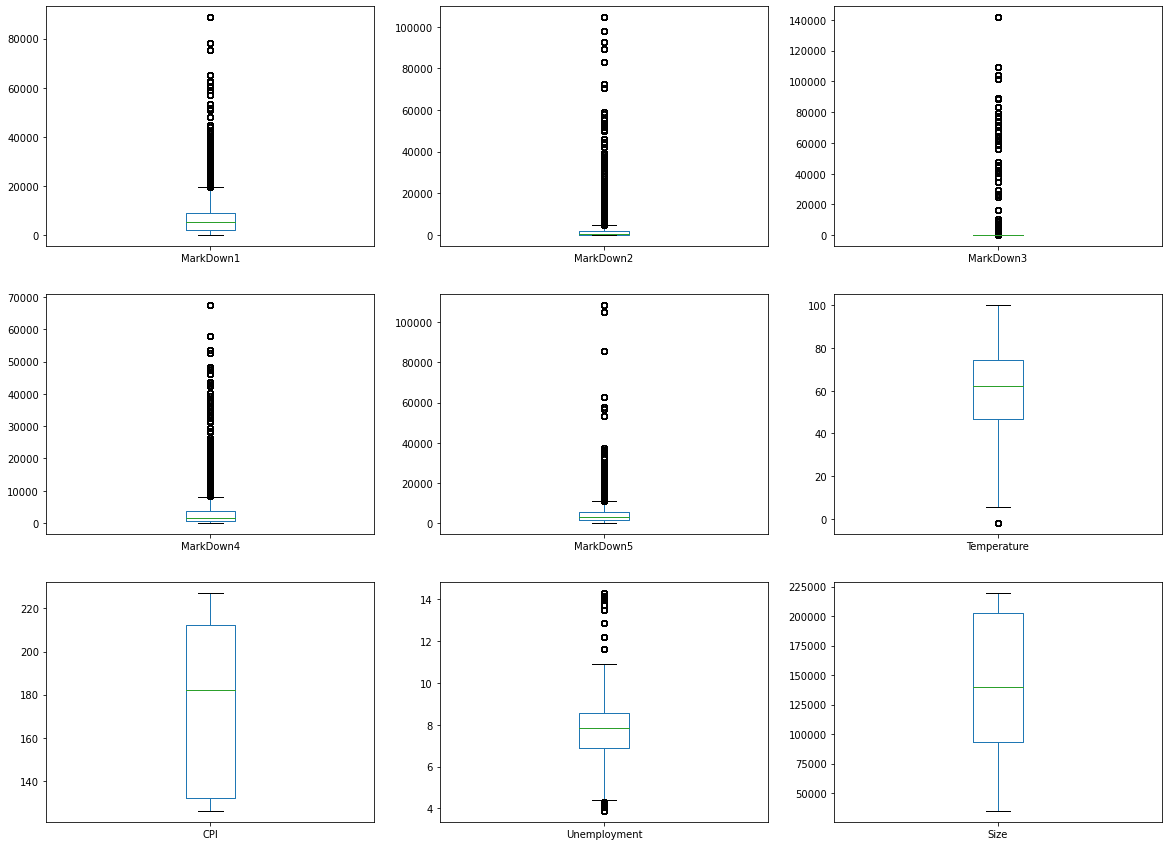

In [21]:
new_train[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Temperature', 'CPI', 
           'Unemployment', 'Size']].plot(kind='box',subplots=1,layout=(3,3), figsize=(20,15))

**Insight of the box plot**
- MarkDown attribute has many outliers.
- Mean of most of the attribute is off center.\
Feature Scaling can solve most of the these problem.

## Modelling
This section contains
- Preprocessing
- Feature Scaling
- Trying different models
- Fine tuning the best model

In [22]:
# Numerical Attribute
train_num = new_train.drop(["Store", "Dept", "Type", "Weekly_Sales"], axis=1)

# Categorical Attribute
train_cat = new_train[["Store", "Dept", "Type"]]

# Labels
y_train = new_train.Weekly_Sales

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('std_scaler', StandardScaler()),
])

num_attribs = list(train_num)
cat_attribs = list(train_cat)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

X_train = full_pipeline.fit_transform(new_train)
X_test = full_pipeline.fit_transform(new_test)

In [24]:
from sklearn.model_selection import train_test_split
X1_train, X_valid, y1_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def display_score(model):
    model.fit(X1_train, y1_train)
    
    scores = cross_val_score(model, X1_train, y1_train, scoring="neg_mean_squared_error", cv = 5)
    print("Mean Squared Error CV: {}".format(np.mean(-scores)))
    print("Root Mean Squared Error CV: {}".format(np.mean(np.sqrt(-scores))))
    
    # Robustness of the model will be checked on test set via r2 score
    r2 = r2_score(y_valid, model.predict(X_valid))
    print("R2 Score of this model: {}".format(r2))

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

print("Linear Regression:\n")
display_score(lin_reg)

Linear Regression:

Mean Squared Error CV: 177307166.26424664
Root Mean Squared Error CV: 13314.990724368294
R2 Score of this model: 0.6622338157884484


*Clearly not a good model as we can see the underfitting here also R2 score is not that great.\
Skipping Ridge, Lasso, SVM we will start with the more versatile model Descision Tree the we will move in Ensemble Model*

In [27]:
from sklearn.tree import DecisionTreeRegressor

dec_reg = DecisionTreeRegressor()

print("Decision Tree Regression:\n")
display_score(dec_reg)

Decision Tree Regression:

Mean Squared Error CV: 60367863.261657454
Root Mean Squared Error CV: 7768.1072691488025
R2 Score of this model: 0.8941999269013687


*Significantly better model as compared to Linear Regression\
Let's try different ensemble model and see if we can perform better*

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr_reg = RandomForestRegressor(n_estimators=100, max_leaf_nodes=20, random_state=42, n_jobs=-1)

print("Random Forest Regression:\n")
display_score(rfr_reg)

Random Forest Regression:

Mean Squared Error CV: 199537910.39748564
Root Mean Squared Error CV: 14125.467730907
R2 Score of this model: 0.6187949324323287


*Quiet weired, RandomForest should perform as per with the descision tree if not better, but here it is not. This may be beacause the number of features is quite high, and it may require more number of estimator without regularization(same as decision tree.). But Random forest training time is very high. Hence we will look for faster trainer such as XGboost and LGBMRegressor*

In [29]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()

print("Extreme Gradient Boosting Regression:\n")
display_score(xgb_reg)

Extreme Gradient Boosting Regression:

Mean Squared Error CV: 47217656.73191156
Root Mean Squared Error CV: 6870.356934345941
R2 Score of this model: 0.9131839224774596


In [30]:
from sklearn.ensemble import ExtraTreesRegressor

etr_reg = ExtraTreesRegressor(n_jobs=-1)

print("Extra Tree Regression:\n")
display_score(etr_reg)

Extra Tree Regression:

Mean Squared Error CV: 34872773.27656739
Root Mean Squared Error CV: 5904.909213952604
R2 Score of this model: 0.9443886577079074


In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_reg = GradientBoostingRegressor()

print("Gradient Boosting Regression:\n")
display_score(gbr_reg)

Gradient Boosting Regression:

Mean Squared Error CV: 146511725.9031945
Root Mean Squared Error CV: 12103.329650062951
R2 Score of this model: 0.7227716381689266


In [32]:
from lightgbm import LGBMRegressor

lgbm_reg = LGBMRegressor(n_jobs=-1)

print("Light Gradient Boosting Machine Regression:\n")
display_score(lgbm_reg)

Light Gradient Boosting Machine Regression:

Mean Squared Error CV: 62557037.54056694
Root Mean Squared Error CV: 7907.61009989343
R2 Score of this model: 0.8869257935638197


In [33]:
from sklearn.ensemble import AdaBoostRegressor

abr_reg = AdaBoostRegressor()

print("Adaptive Boosting Regression:\n")
display_score(abr_reg)

Adaptive Boosting Regression:

Mean Squared Error CV: 860276491.4718678
Root Mean Squared Error CV: 29298.953198468615
R2 Score of this model: -0.7133303680105443


*So we have found Extra tree regressor as best model. Let's dig deep into this model.*

## Fine Tuning the best Model

*We will train this model on complete train set without spliting for the validation set.\
Then we will fine tune the model via grid search.*

In [38]:
from sklearn.model_selection import GridSearchCV

model = ExtraTreesRegressor(n_jobs=-1)

param_grid=[{'n_estimators': range(50,126,25), 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': range(2,11,2),}]

ext_gs = GridSearchCV(model, param_grid, scoring='r2', cv=5)

result = ext_gs.fit(X_train, y_train)

print("Best: %f using %s" % (result.best_score_, result.best_params_))

best_model = ExtraTreesRegressor(**result.best_params_)

best_model.fit(X_train, y_train)

Best: 0.9492185677701156 using {'n_estimators': 125, 'max_features': 'auto', 'min_samples_split': 2}


## Predicting

In [39]:
pred_value = etr_reg.predict(X_test)

In [40]:
predicted = test

predicted["Predicted Weekly_Sales"] = pred_value
print(predicted.head())

predicted.to_csv(r'C:/Users/ashwa/Desktop/BluePi/sales-prediction/predicted.csv', index = False)

   Store  Dept        Date  IsHoliday  Predicted Weekly_Sales
0      1     1  2012-11-02      False              24453.5370
1      1     1  2012-11-09      False              28759.6947
2      1     1  2012-11-16      False              23385.6497
3      1     1  2012-11-23       True              23484.9967
4      1     1  2012-11-30      False              26387.7732


## Plot

In [41]:
predicted_total_weekly_sale = predicted.groupby(by=["Date"], as_index = False)["Predicted Weekly_Sales"].sum()
total_weekly_sale.tail()

,Date,Weekly_Sales
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57
142,2012-10-26,45544116.29


In [42]:
predicted_total_weekly_sale.head()

,Date,Predicted Weekly_Sales
0,2012-11-02,4.795508e+07
1,2012-11-09,4.808146e+07
2,2012-11-16,4.834098e+07
3,2012-11-23,6.001555e+07
4,2012-11-30,5.139065e+07


In [43]:
total_weekly_sale.set_index(keys = "Date", inplace = True)
predicted_total_weekly_sale.set_index(keys = "Date", inplace = True)

<AxesSubplot:xlabel='Date'>

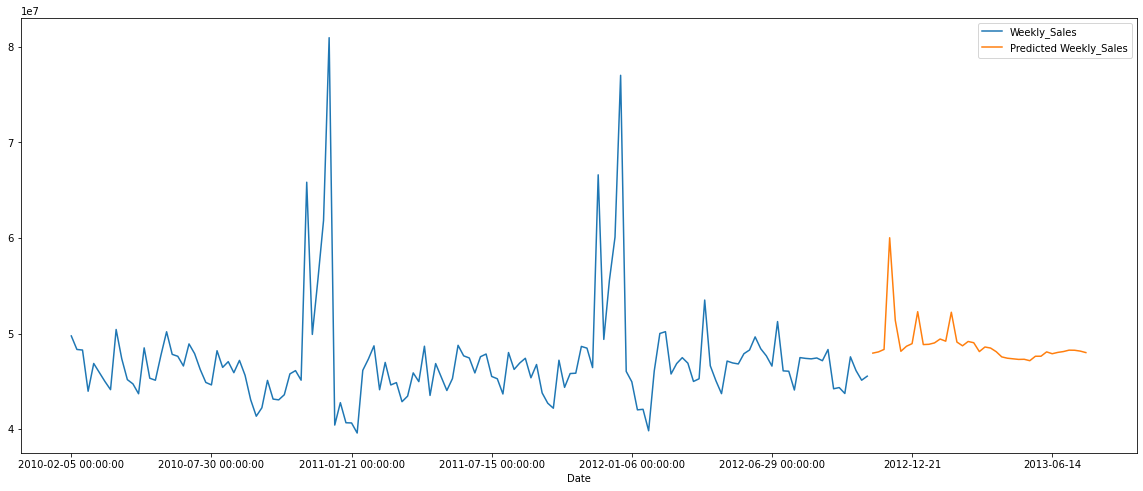

In [44]:
future_df=pd.concat([total_weekly_sale, predicted_total_weekly_sale])
  
future_df[['Weekly_Sales', 'Predicted Weekly_Sales']].plot(figsize=(20, 8))